# Active Learning Experiment Script

Store the demonstration query data in `./Data` folder. Set the path to the data and output folders from `params.py`.

In [5]:
from DemoScript import *
import matplotlib
import active_params as params
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20,10]

import warnings
warnings.filterwarnings("ignore") 

First read the raw data and store only the points where proposition changes were observed

In [2]:
params.nTraj = 2
raw_data = read_raw_data(params.raw_data_path)
compressed_data = compress_data(raw_data)
write_data(params.compressed_data_path, compressed_data)
params.nSamples = 20000
params.nBurn = 500

## Batch Inference

In [3]:

infer_command = f'webppl batch_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nTraj {params.nTraj}'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl batch_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Active_Data/CompressedData' --outPath 'Active_Data/Distributions' --nTraj 2


Compile a PUnS MDP and train a policy for the MDP with Q-learning

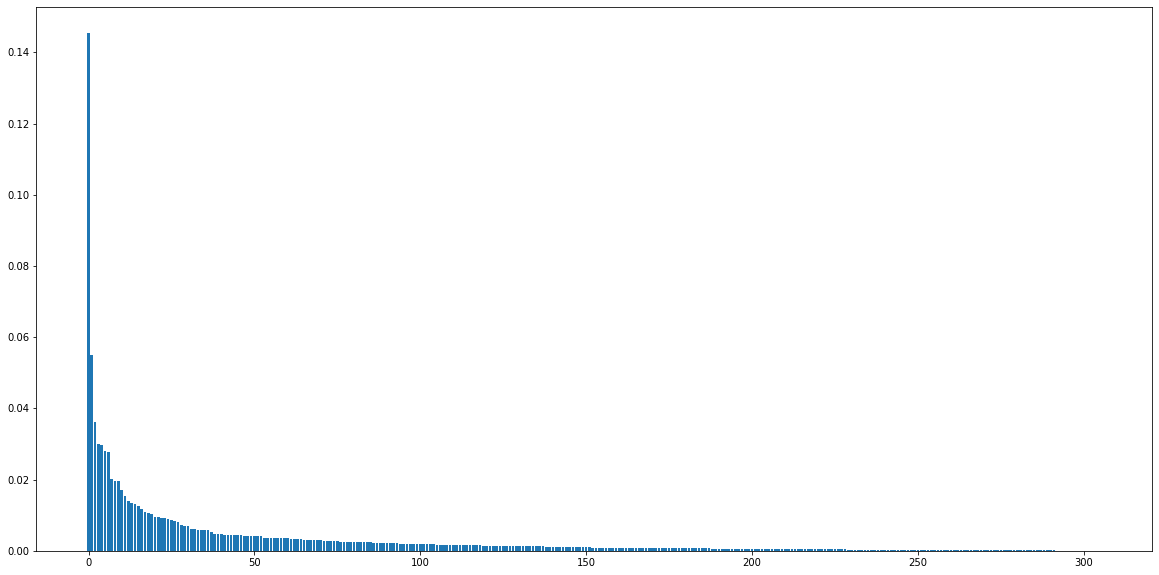

In [6]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)
plot_probs(MDP)


In [7]:
MDP.specification_fsm._formulas[200]

['and',
 ['F', ['W0']],
 ['F', ['W2']],
 ['F', ['W4']],
 ['U', ['not', ['W1']], ['W0']]]

Determine what the terminal state rewards are and plot the terminal state rewards in ascending order

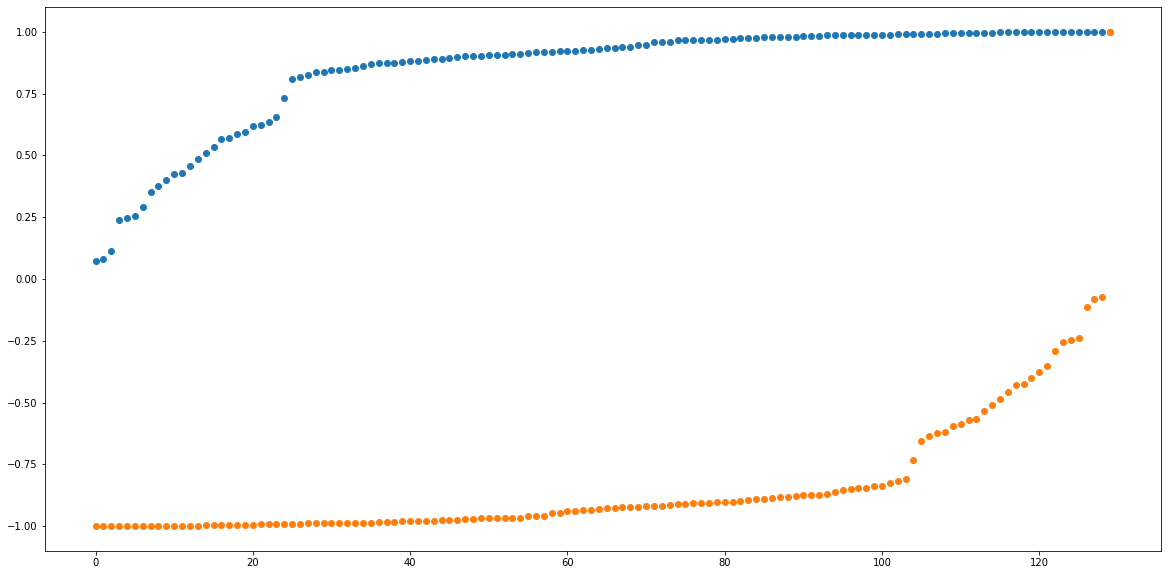

In [8]:
specification_fsm = MDP.specification_fsm
states = list(specification_fsm.states2id.keys())
rewards = [specification_fsm.reward_function(state, force_terminal=True) for state in states]
plt.plot(np.sort(np.abs(rewards)),'o')
plt.plot(np.sort(rewards),'o')


## Query 1

Training episode 4999         

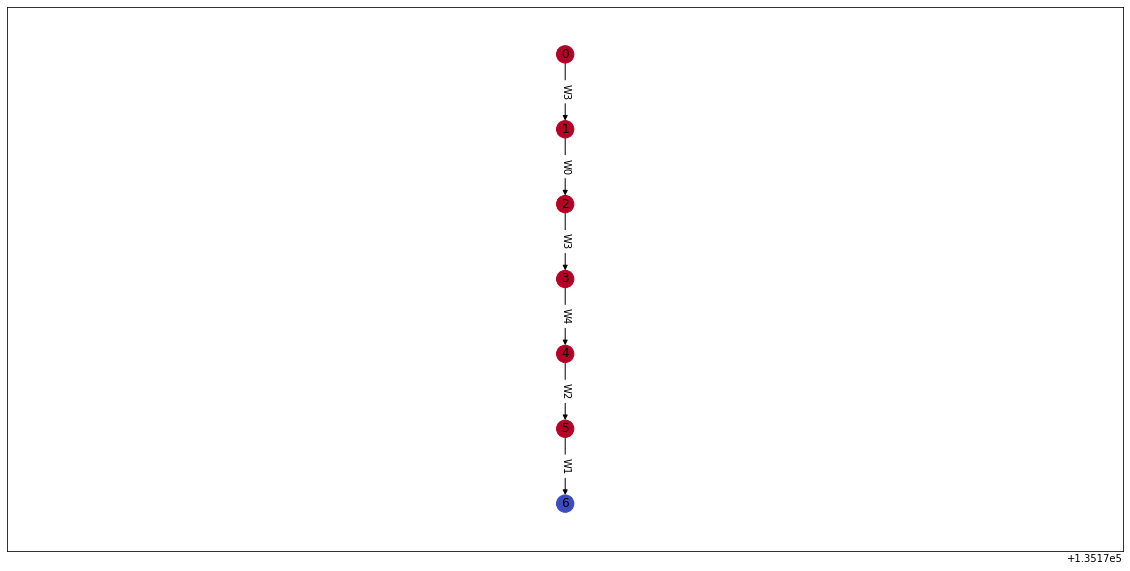

In [9]:
query1 = create_active_query(MDP, verbose = True)
_ = query1['agent'].visualize_exploration()

In [10]:
label = False
new_traj = create_query_demo(query1['trace'])
write_demo_query_data(new_traj, label, params.compressed_data_path, query_number = 1)

Writing file: query_1.json


**Update the distribution**

In [11]:
infer_command = f'webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nQuery 1'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Active_Data/CompressedData' --outPath 'Active_Data/Distributions' --nQuery 1


**Plot the updated distribution and reward function**

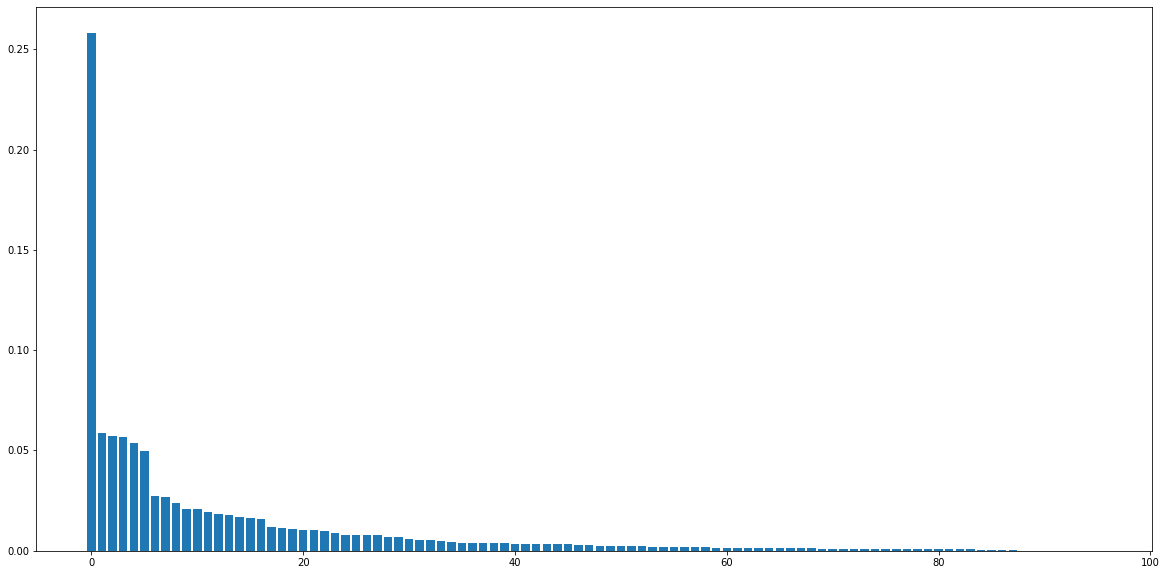

In [12]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)
plot_probs(MDP)

In [13]:
MDP.specification_fsm._formulas[0]

['and',
 ['F', ['W0']],
 ['F', ['W1']],
 ['F', ['W2']],
 ['F', ['W3']],
 ['F', ['W4']],
 ['U', ['not', ['W1']], ['W4']],
 ['U', ['not', ['W4']], ['W2']],
 ['U', ['not', ['W1']], ['W2']],
 ['U', ['not', ['W2']], ['W0']],
 ['U', ['not', ['W4']], ['W0']],
 ['U', ['not', ['W1']], ['W0']]]

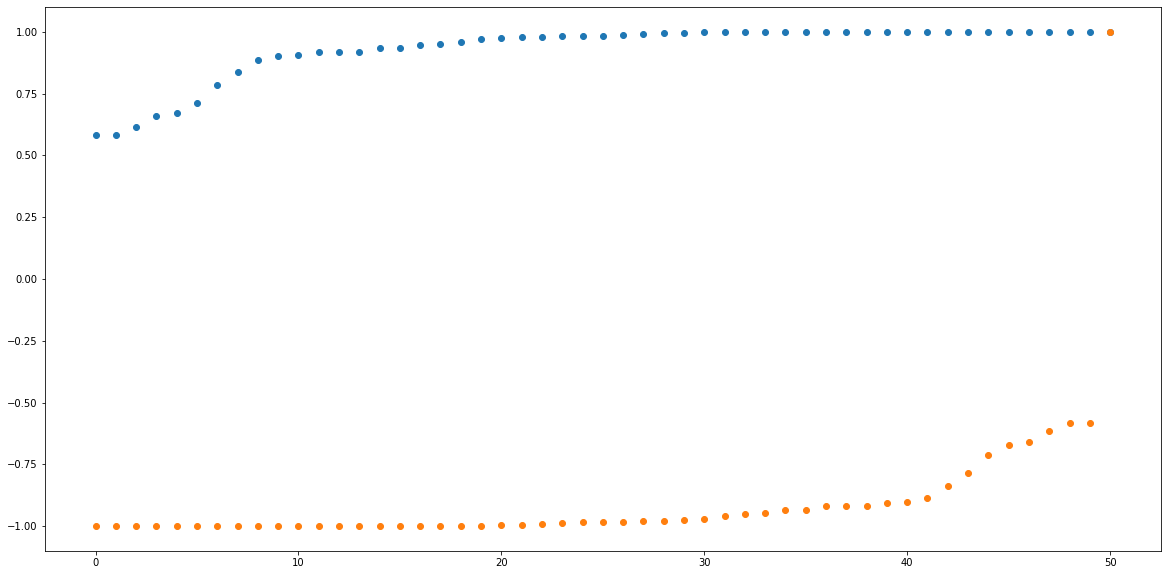

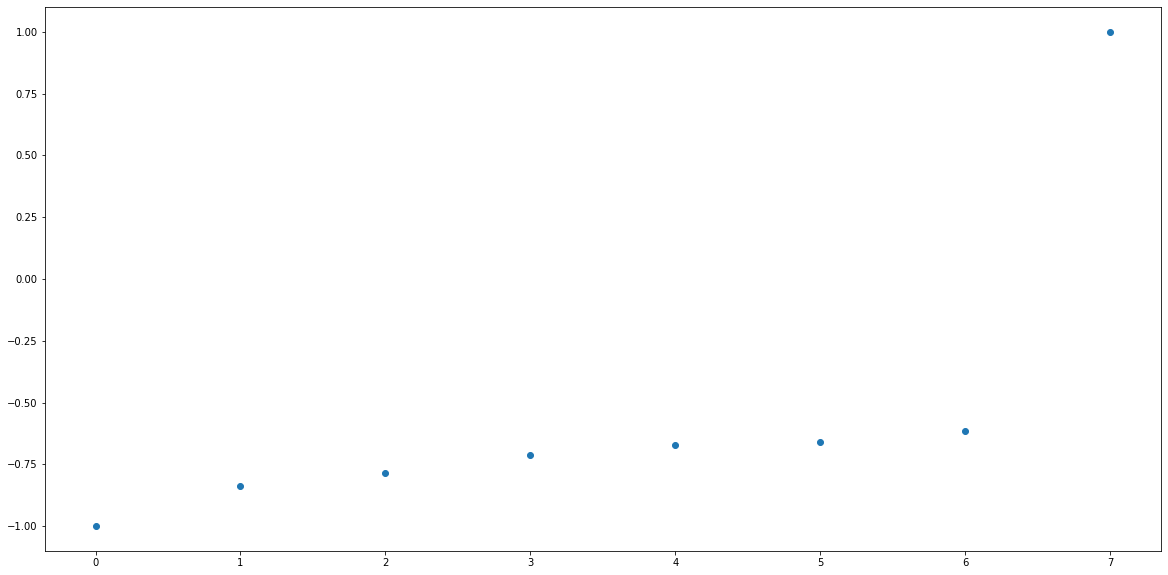

In [14]:
specification_fsm = MDP.specification_fsm
states = list(specification_fsm.states2id.keys())
rewards = [specification_fsm.reward_function(state, force_terminal=True) for state in states]
plt.plot(np.sort(np.abs(rewards)),'o')
plt.plot(np.sort(rewards),'o')

rewards = [MDP.specification_fsm.reward_function(state) for state in MDP.specification_fsm.terminal_states]
plt.figure()
plt.plot(np.sort(rewards),'o')

## Query 2

Training episode 4999         

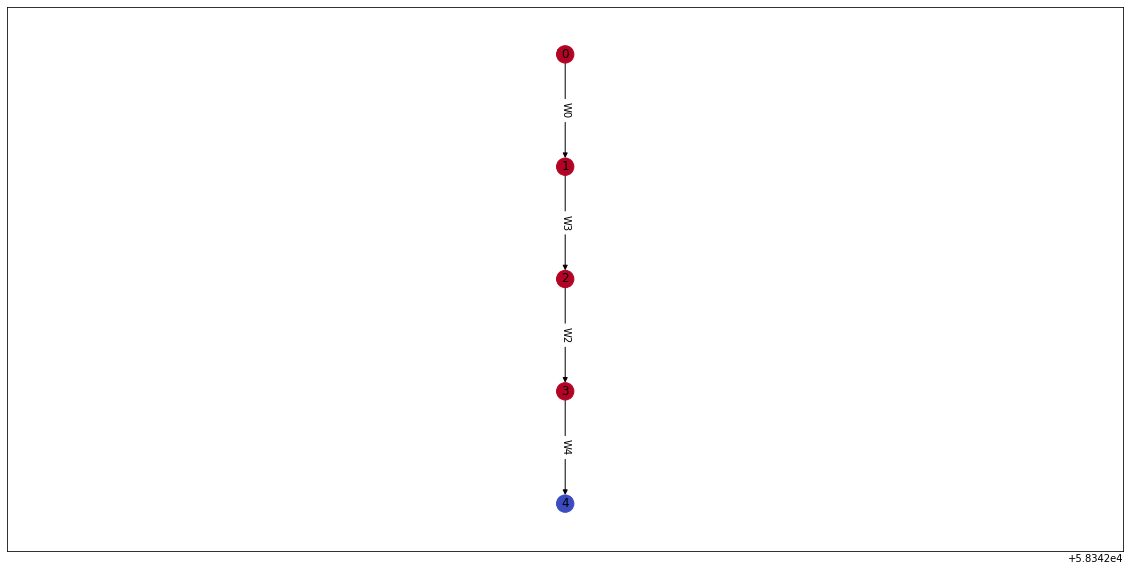

In [15]:
query2 = create_active_query(MDP, verbose = True)
_ = query2['agent'].visualize_exploration()

In [16]:
label = False
new_traj = create_query_demo(query2['trace'])
write_demo_query_data(new_traj, label, params.compressed_data_path, query_number = 2)

Writing file: query_2.json


**Update the distribution**

In [17]:
infer_command = f'webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nQuery 2'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Active_Data/CompressedData' --outPath 'Active_Data/Distributions' --nQuery 2


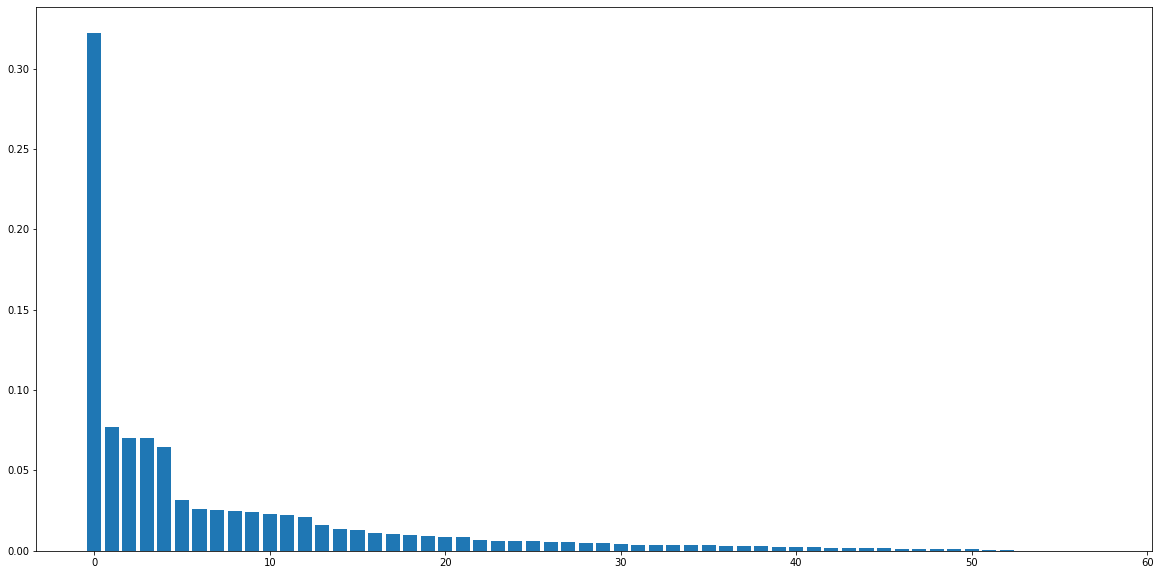

In [18]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)
plot_probs(MDP)

In [19]:
MDP.specification_fsm._formulas[0]


['and',
 ['F', ['W0']],
 ['F', ['W1']],
 ['F', ['W2']],
 ['F', ['W3']],
 ['F', ['W4']],
 ['U', ['not', ['W1']], ['W4']],
 ['U', ['not', ['W4']], ['W2']],
 ['U', ['not', ['W1']], ['W2']],
 ['U', ['not', ['W2']], ['W0']],
 ['U', ['not', ['W4']], ['W0']],
 ['U', ['not', ['W1']], ['W0']]]

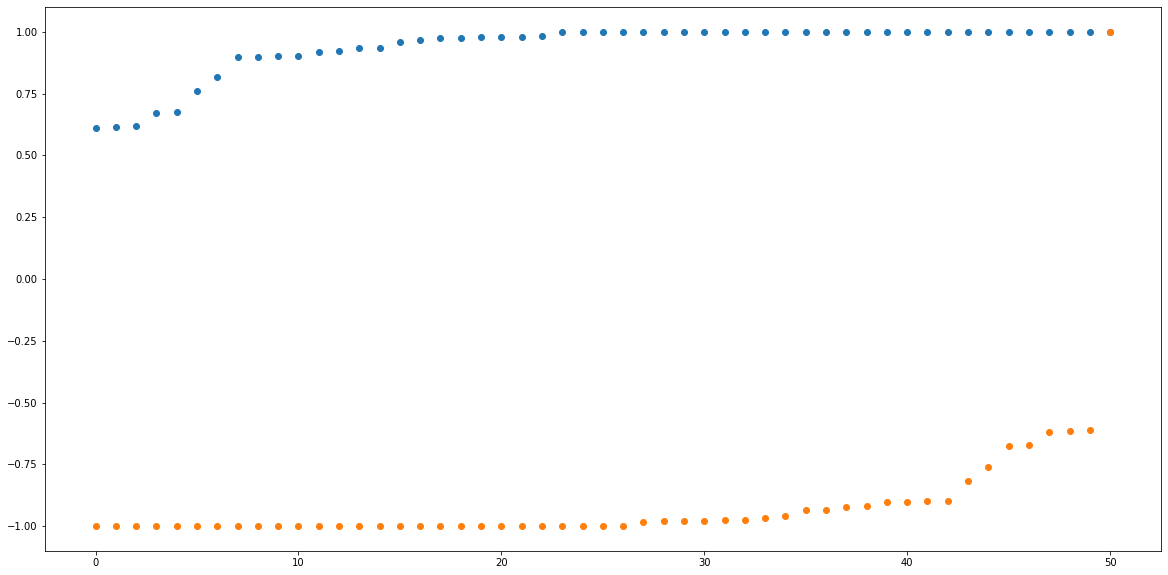

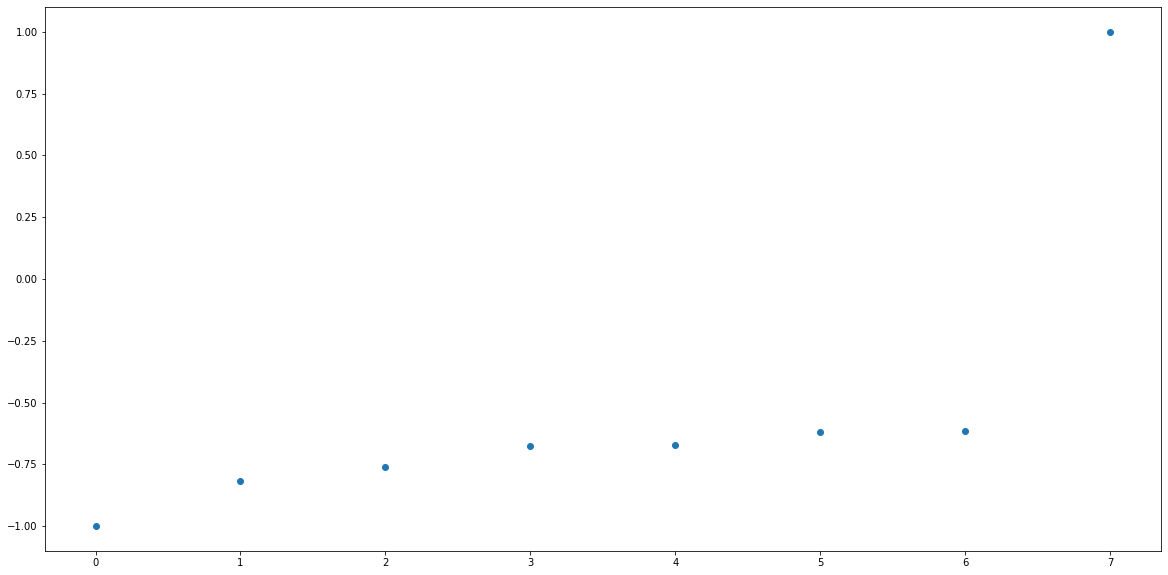

In [20]:
specification_fsm = MDP.specification_fsm
states = list(specification_fsm.states2id.keys())
rewards = [specification_fsm.reward_function(state, force_terminal=True) for state in states]
plt.plot(np.sort(np.abs(rewards)),'o')
plt.plot(np.sort(rewards),'o')

rewards = [MDP.specification_fsm.reward_function(state) for state in MDP.specification_fsm.terminal_states]
plt.figure()
plt.plot(np.sort(rewards),'o')

## Query 3

Training episode 29         

Training episode 4999         

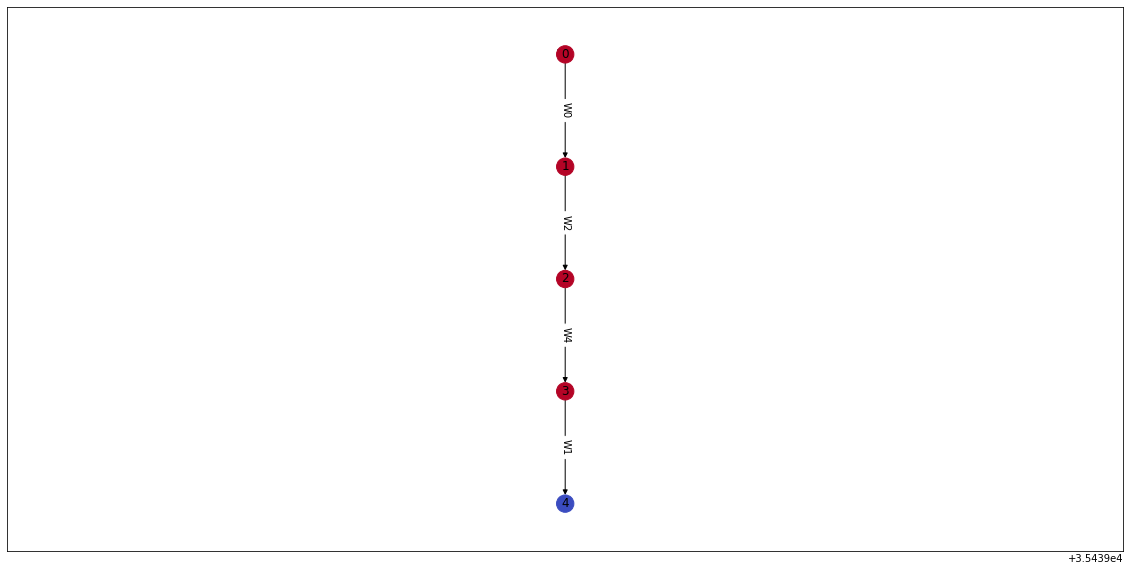

In [21]:
query3 = create_active_query(MDP, verbose = True)
_ = query3['agent'].visualize_exploration()

In [22]:
label = False
new_traj = create_query_demo(query3['trace'])
write_demo_query_data(new_traj, label, params.compressed_data_path, query_number = 3)

Writing file: query_3.json


In [23]:
infer_command = f'webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nQuery 3'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Active_Data/CompressedData' --outPath 'Active_Data/Distributions' --nQuery 3


**This is the final posterior**

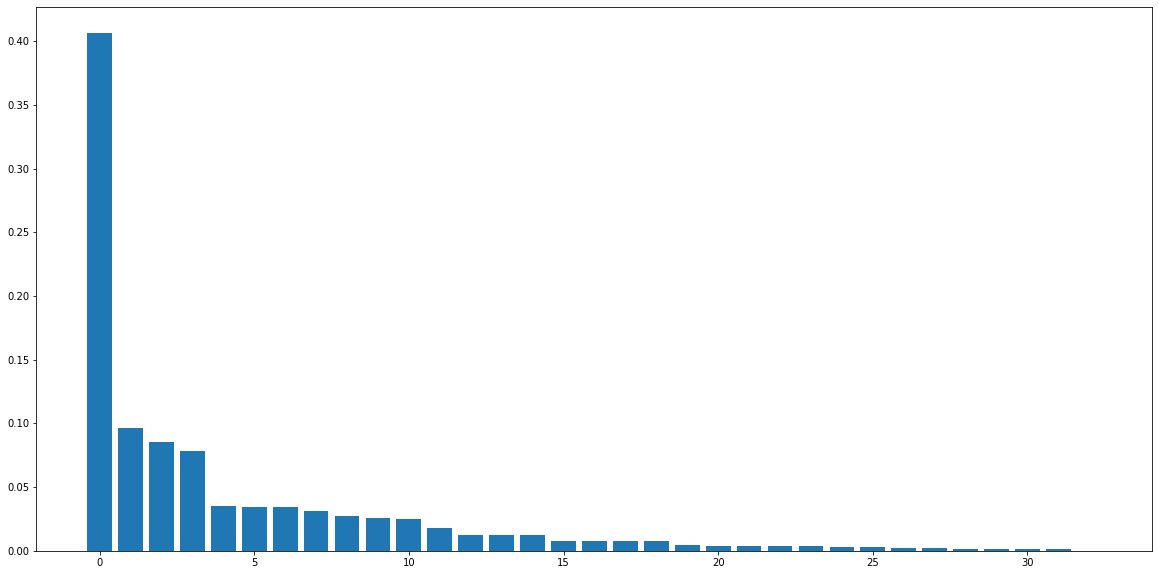

In [24]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)
plot_probs(MDP)

In [25]:
MDP.specification_fsm._formulas[0]

['and',
 ['F', ['W0']],
 ['F', ['W1']],
 ['F', ['W2']],
 ['F', ['W3']],
 ['F', ['W4']],
 ['U', ['not', ['W1']], ['W4']],
 ['U', ['not', ['W4']], ['W2']],
 ['U', ['not', ['W1']], ['W2']],
 ['U', ['not', ['W2']], ['W0']],
 ['U', ['not', ['W4']], ['W0']],
 ['U', ['not', ['W1']], ['W0']]]

In [ ]:


specification_fsm = MDP.specification_fsm
states = list(specification_fsm.states2id.keys())
rewards = [specification_fsm.reward_function(state, force_terminal=True) for state in states]
plt.plot(np.sort(np.abs(rewards)),'o')
plt.plot(np.sort(rewards),'o')

rewards = [MDP.specification_fsm.reward_function(state) for state in MDP.specification_fsm.terminal_states]
plt.figure()
plt.plot(np.sort(rewards),'o')

## Generating Final Plan

Training episode 32         

Training episode 75         

Training episode 122         

Training episode 165         

Training episode 195         

Training episode 244         

Training episode 291         

Training episode 337         

Training episode 391         

Training episode 445         

Training episode 499         

Training episode 541         

Training episode 585         

Training episode 633         

Training episode 674         

Training episode 723         

Training episode 774         

Training episode 825         

Training episode 878         

Training episode 925         

Training episode 977         

Training episode 1019         

Training episode 1073         

Training episode 1131         

Training episode 1183         

Training episode 1234         

Training episode 1290         

Training episode 1343         

Training episode 1393         

Training episode 1449         

Training episode 1503         

Training episode 1556         

Training episode 4999         

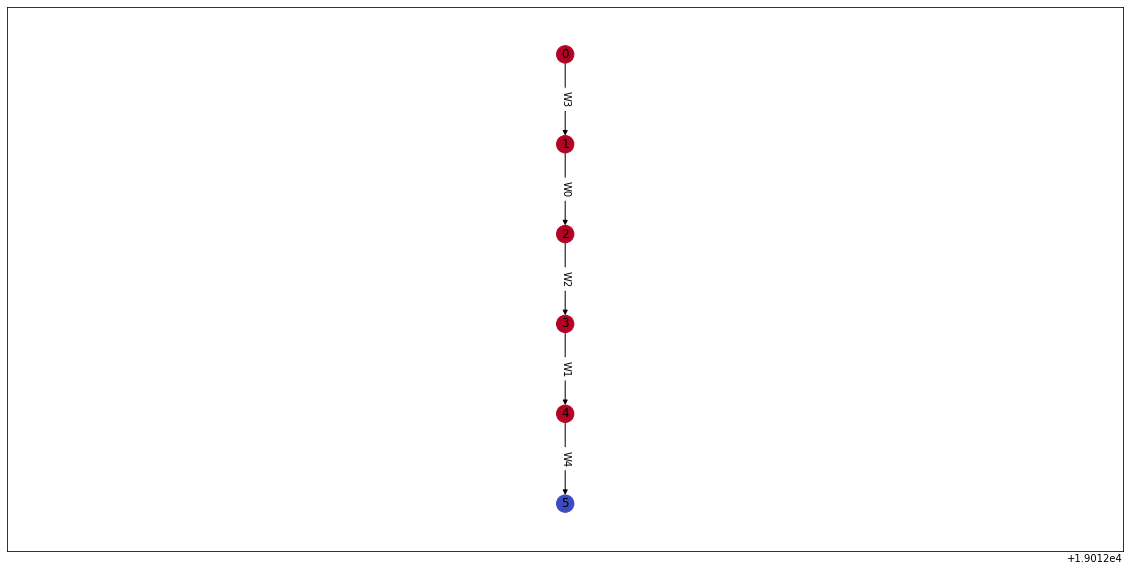

In [29]:
query = create_active_query_non_terminal(MDP, verbose = True)
_ = query['agent'].visualize_exploration()

In [30]:
label = True
new_traj = create_query_demo(query['trace'])
write_demo_query_data(new_traj, label, params.compressed_data_path, query_number = 3)

Writing file: query_3.json


In [31]:
infer_command = f'webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nQuery 3'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Active_Data/CompressedData' --outPath 'Active_Data/Distributions' --nQuery 3


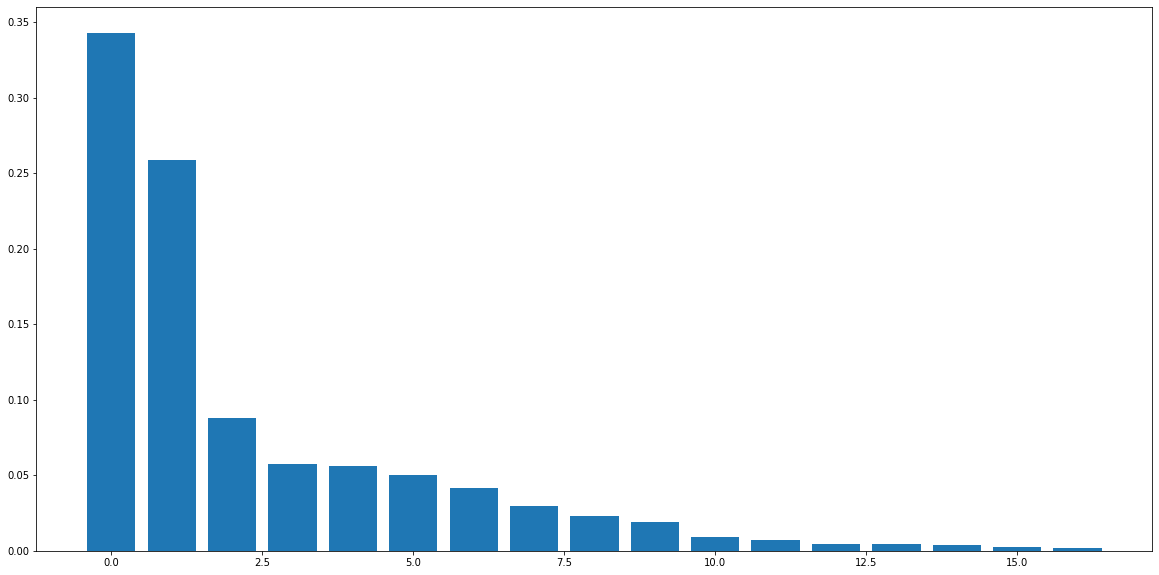

In [32]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)
plot_probs(MDP)

In [37]:
MDP.specification_fsm._formulas[1]

['and',
 ['F', ['W0']],
 ['F', ['W1']],
 ['F', ['W2']],
 ['F', ['W3']],
 ['F', ['W4']],
 ['U', ['not', ['W1']], ['W2']],
 ['U', ['not', ['W2']], ['W0']],
 ['U', ['not', ['W1']], ['W0']]]

(<networkx.classes.digraph.DiGraph at 0x7f3f3946e208>,
 [-1.0,
  1.0,
  -0.7305,
  -1.0,
  -1.0,
  -0.9946,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -0.9096,
  0.22440000000000002,
  -0.7761999999999999,
  -1.0,
  -1.0,
  -1.0,
  -0.13399999999999998,
  -1.0,
  -1.0,
  -1.0])

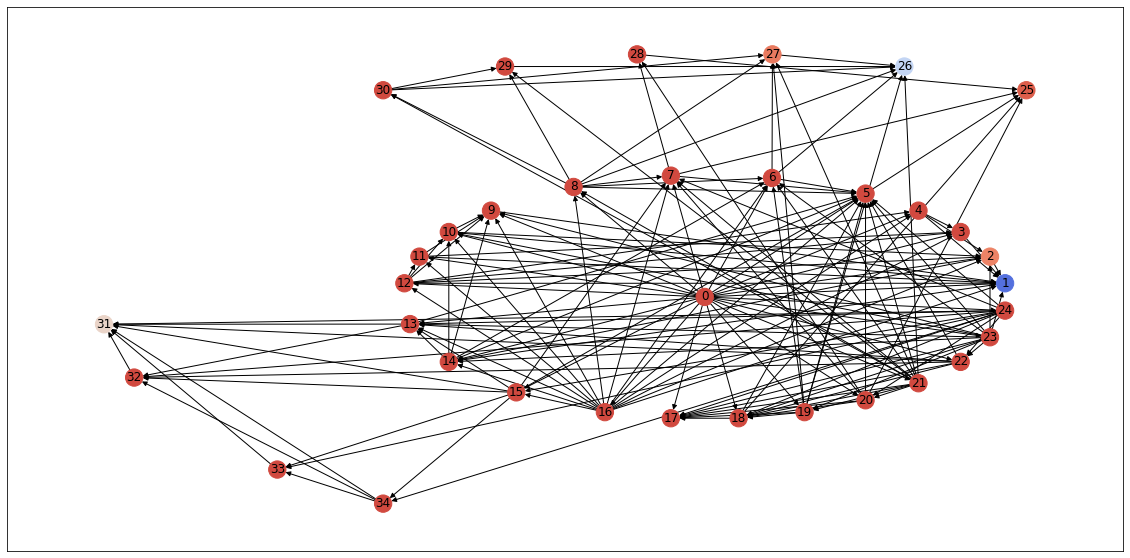

In [38]:
MDP.specification_fsm.visualize()